## INTROTONEURALNETWORKS/BUILDINGNEURALNETWORKS/INTROTONEURALNETWORKS BUILDINGNEURALNETWORKS 3 EXERCISE  ##
#### Exercise ####
#### Please refer to module 1 of IntroToNeuralNetworks - BuildingNeuralNetworks for Tasks 1-7
#### Task 1
##### Load the required libraries.
#### Result:


In [1]:
#=================================================-
#### Slide 6: Loading packages  ####

# Helper packages.
from pathlib import Path 
import matplotlib.pyplot as plt
import numpy as np                                    
import pandas as pd
import pickle
from textwrap import wrap
# Scikit-learn package for building a perceptron.
from sklearn.neural_network import MLPClassifier

# Scikit-learn package for data preprocessing.
from sklearn.preprocessing import MinMaxScaler
# Model set up, tuning and model metrics packages.
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import GridSearchCV




#### Task 2
##### Set the working directory to data directory.
##### Print the working directory.
#### Result:


In [2]:
#=================================================-
#### Slide 5: Directory settings  ####

# Set 'main_dir' to location of the project folder
data_dir = Path.cwd().parent / "data"
data_dir.exists()

True

#### Task 3
##### Load the dataset `bank_marketing.csv` and save it to `bank_marketing`.
##### Print the first few rows of `bank_marketing`.
#### Result:


In [3]:
#=================================================-
#### Slide 7: Load the data  ####

credit_card = pd.read_csv(
    data_dir / 'bank_marketing.csv'
)
credit_card.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


#### Task 4
##### Check for NAs in `bank_marketing` and print the count of the NAs in each column. If the missing value is from a integer type column, fill it with the mean value of the column.
##### Now, print the count of the NAs in each column.
#### Result:


In [4]:
credit_card.shape

(41188, 21)

In [5]:
#=================================================-
#### Slide 10: Check for NAs in the dataset  ####

# Check for NAs. 
credit_card.isna().sum() / credit_card.shape[0]

age               0.000000
job               0.000000
marital           0.000000
education         0.000000
default           0.000000
housing           0.000000
loan              0.000000
contact           0.000000
month             0.000000
day_of_week       0.000000
duration          0.000000
campaign          0.000000
pdays             0.963217
previous          0.000000
poutcome          0.000000
emp.var.rate      0.000000
cons.price.idx    0.000000
cons.conf.idx     0.000000
euribor3m         0.000000
nr.employed       0.000000
y                 0.000000
dtype: float64

In [6]:
#=================================================-
#### Slide 11: Using fillna() to handle missing values

 # Fill missing values with mean 
credit_card = credit_card.fillna(
    credit_card.mean(numeric_only=True)
)
 # Check for NAs in 'BILL_AMT1'. 
credit_card['pdays'].isna().sum()

0

#### Task 5
##### Print the data types of all the columns in `bank_marketing`
##### Perform one hot encoding on the variables with data type object except the target variable `y` 
##### Drop the original variables and concatenate the dummies to original datset
#### Result:


In [7]:
#=================================================-
#### Slide 9: The data at first glance  ####

# The data types.
print(credit_card.dtypes)

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays             float64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed         int64
y                  object
dtype: object


In [8]:
len(credit_card) / 1000

41.188

In [9]:
credit_card.nunique() < (len(credit_card) / 1000)

age               False
job                True
marital            True
education          True
default            True
housing            True
loan               True
contact            True
month              True
day_of_week        True
duration          False
campaign          False
pdays              True
previous           True
poutcome           True
emp.var.rate       True
cons.price.idx     True
cons.conf.idx      True
euribor3m         False
nr.employed        True
y                  True
dtype: bool

In [10]:
df = pd.get_dummies(
    credit_card,
    columns=[
        "marital",
        "education",
        "default",
        "housing",
        "loan",
        "contact",
        "month",
        "day_of_week",
        "poutcome",
    ]
)

In [11]:
X = credit_card.drop("y", axis=1)
y = credit_card["y"]

In [12]:
X = pd.get_dummies(X)

In [13]:
X

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,6.014521,0,1.1,93.994,-36.4,4.857,5191,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,6.014521,0,1.1,93.994,-36.4,4.857,5191,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,6.014521,0,1.1,93.994,-36.4,4.857,5191,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,6.014521,0,1.1,93.994,-36.4,4.857,5191,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,6.014521,0,1.1,93.994,-36.4,4.857,5191,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,6.014521,0,-1.1,94.767,-50.8,1.028,4964,...,0,0,1,0,0,0,0,0,1,0
41184,46,383,1,6.014521,0,-1.1,94.767,-50.8,1.028,4964,...,0,0,1,0,0,0,0,0,1,0
41185,56,189,2,6.014521,0,-1.1,94.767,-50.8,1.028,4964,...,0,0,1,0,0,0,0,0,1,0
41186,44,442,1,6.014521,0,-1.1,94.767,-50.8,1.028,4964,...,0,0,1,0,0,0,0,0,1,0


#### Task 6
##### Split the target variable from the dataset and save as `X`. 
##### Save the target variable as `y`.
#### Result:


#### Task 7
##### Split X and y into training and test sets with a 70 : 30 ratio and save respective variables to `X_train`, `X_test`, `y_train`, `y_test`.
##### Scale the train and test datasets using Min max scaler and save as `X_train_scaled` and `X_test_scaled` respectively.
#### Result: 


In [14]:
tts = train_test_split(X, y, random_state=42)

In [15]:
[s.shape for s in tts]

[(30891, 63), (10297, 63), (30891,), (10297,)]

In [16]:
#=================================================-
#### Slide 17: Data prep: scale with MinMaxScaler  ####

# Transforms each feature to a given range.
# The default is the range between 0 and 1.
min_max_scaler = preprocessing.MinMaxScaler()
X_train_scaled = min_max_scaler.fit_transform(tts[0])
X_test_scaled = min_max_scaler.transform(tts[1])

pd.DataFrame(X_train_scaled, columns=X.columns).head()
#######################################################
####  CONGRATULATIONS ON COMPLETING THIS MODULE!   ####
#######################################################


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0.407407,0.031110,0.000000,0.22276,0.0,0.9375,0.698753,0.602510,0.957379,0.859848,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.111111,0.043310,0.071429,0.22276,0.0,0.9375,0.698753,0.602510,0.956926,0.859848,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.209877,0.017283,0.047619,0.22276,0.0,1.0000,0.484412,0.615063,0.981637,1.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.160494,0.065474,0.000000,0.22276,0.0,0.9375,0.698753,0.602510,0.956926,0.859848,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.148148,0.069337,0.023810,0.22276,0.0,0.6875,0.389322,0.368201,0.780322,0.878788,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


#### Please refer to module 2 of IntroToNeuralNetworks - BuildingNeuralNetworks for Tasks 8-13
#### Task 8
##### Build the neural network model with MLPClassifier with


  - 64 neurons for hidden layer
  - The random state at 1


In [17]:
#=================================================-
#### Slide 2: Build the model architecture  ####

# Build neural network model
nn = MLPClassifier(hidden_layer_sizes=64, random_state=1)

##### Save the model as `nn`. 
##### Fit `nn` with `X_train_scaled` and `y_train`  and save the fitted model as `fit_nn`. 
#### Result: 


In [18]:
#=================================================-
#### Slide 3: Fit the model to training data  ####

# Fit the saved model to your training data.
nn.fit(X_train_scaled, tts[2])  

/usr/local/Caskroom/mambaforge/base/envs/nep/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=64, random_state=1)

#### Task 9
##### Compute the train accuracy score of the `fit_nn` model. 
##### Print the accuracy score. 
#### Result: 


In [19]:
#=================================================-
#### Slide 4: Inspect accuracy of training model  ####

# Compute accuracy using training data.
acc_train_nn = nn.score(X_train_scaled, tts[2])
print("Train Accuracy:", acc_train_nn)

Train Accuracy: 0.9434786831115859


#### Task 10
##### Using the `fit_nn` model, predict on the `X_test_scaled` dataset and save the predicted values as `predicted_values_nn`. 
##### Print `predicted_values_nn`. 
##### Also, create a confusion matrix with the test data and the predicted values and save as `conf_matrix_test`.
#### Result: 


array([[8695,  449],
       [ 516,  637]])

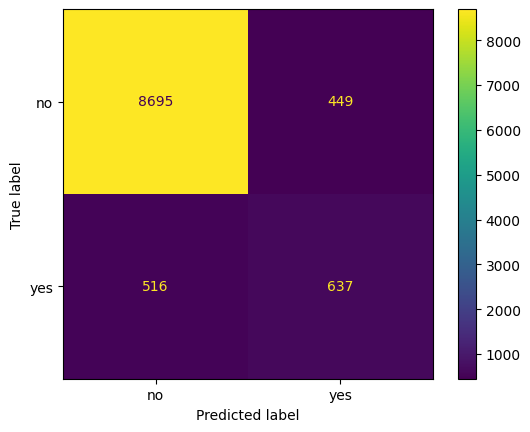

In [20]:
cmd = metrics.ConfusionMatrixDisplay.from_estimator(nn, X_test_scaled, tts[3])
cmd.confusion_matrix


#### Task 11
##### Compute the test model accuracy score and save the value as `test_accuracy_score`. 
##### Create a list of target names `['no', 'yes']` to interpret class assignments and save as `target_names`. 
##### Print an entire classification report.
#### Result: 


In [21]:
#=================================================-
#### Slide 4: Inspect accuracy of training model  ####

# Compute accuracy using training data.
acc_test_nn = nn.score(X_test_scaled, tts[3])
print("Train Accuracy:", acc_test_nn)

Train Accuracy: 0.9062833835097601


#### Task 12
##### Get probabilities instead of predicted values.
##### Also, get probabilities of test predictions.
##### Finally, get FPR, TPR, and threshold values.
#### Result: 


#### Task 13
##### Get AUC by providing the FPR and TPR.
##### Make an ROC curve plot.
#### Result: 


0.9316678541808466

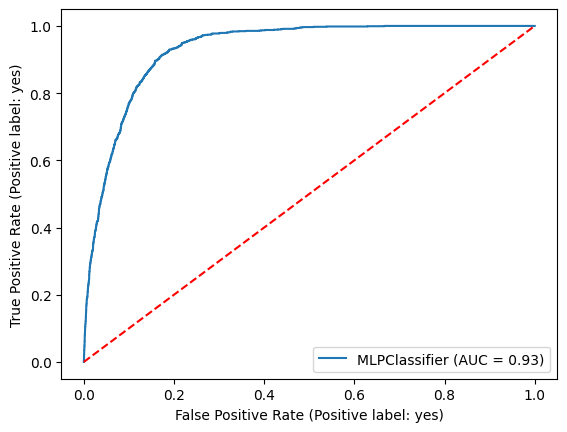

In [22]:
rcd = metrics.RocCurveDisplay.from_estimator(nn, X_test_scaled, tts[3])
plt.plot([0, 1], [0, 1],'r--')
rcd.roc_auc

#### Please refer to module 3 of IntroToNeuralNetworks - BuildingNeuralNetworks for Tasks 14-16
#### Task 14
##### Set up the number of epochs, number of classes, initialize the classifier, and create empty lists to store your train and test scores.
#### Result:


#### Task 15
##### Run partial fit to train data for each epoch and store the train and test scores in respective lists.
#### Result:


In [23]:
#=================================================-
#### Slide 12: Fitting & visualizing training history: accuracy   ####

N_EPOCHS = 25                     #<- number of epochs
N_CLASSES = np.unique(tts[2])    #<- number of classes in the target variable 

# Build neural network model by creating a classifier:
# add the number of hidden neurons in the 1st hidden layer and set random state.
mlp = MLPClassifier(hidden_layer_sizes = (64), random_state = 1)          

scores_train = [] #<- we will store scores for training history here
scores_test = []  #<- we will store scores for testing history here

epoch = 0 #<- set epoch count
while epoch < N_EPOCHS:
    mlp_fit = mlp.partial_fit(X_train_scaled, tts[2], classes=N_CLASSES)
    
    # Compute score for train data.
    scores_train.append(mlp.score(X_train_scaled, tts[2]))
    
    # Compute score for test data.
    scores_test.append(mlp.score(X_test_scaled, tts[3]))
    epoch += 1 #<- increment the epoch

#### Task 16
##### Plot accuracy and loss curves for training history.
#### Result:


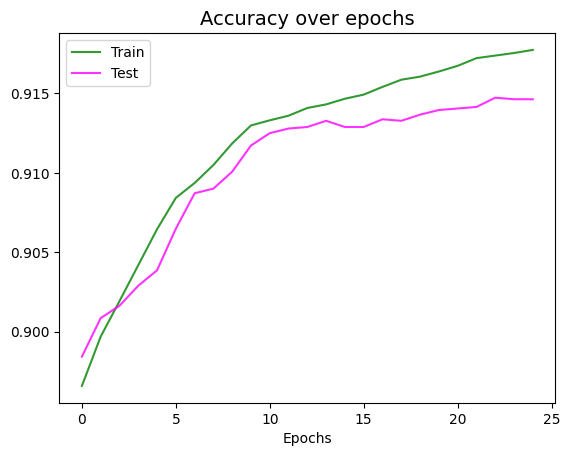

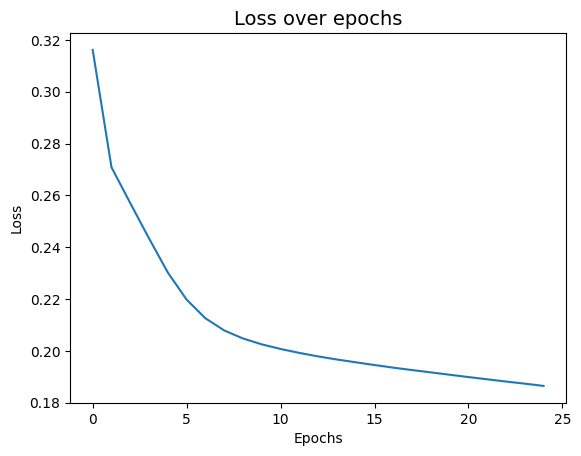

In [24]:
#=================================================-
#### Slide 13: Inspect model accuracy and loss  ####

plt.plot(scores_train, color='green', alpha=0.8, label='Train')
plt.plot(scores_test, color='magenta', alpha=0.8, label='Test')
plt.title("Accuracy over epochs", fontsize=14)
plt.xlabel('Epochs')
plt.legend(loc='upper left')
plt.show()
plt.plot(mlp.loss_curve_)
plt.title("Loss over epochs", fontsize=14)
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()                      


